In [1]:
from shared.preface import *
import shared.functions as fct


#1. Read in all velocities for neutrinos.
nus = 40000
sim = 'L012N376'
mass_gauge = 12.0  # in log10 Msun
mass_range = 0.3
halo_num = 1
halo_j = 0
batchname = f'1e+{mass_gauge}_pm{mass_range}Msun'
hname = f'{batchname}_halo{halo_j}'
fname = f'{nus}nus_{hname}'
u_all = fct.load_sim_data(sim, fname, 'velocities')

#2. Convert to momenta for one test mass and get "Fermi-Dirac weights".
m_nu = 0.3*eV
p, _ = fct.u_to_p_eV(u_all, m_nu)
p0, p1 = p[:,0], p[:,-1]
FD_weights = p0**2 * fct.Fermi_Dirac(p1)

#3. Reshape into angular coord. batches, i.e. (phi, theta) batches. Each 
#   coord. pair has an amount of Vs neutrinos.
p0_angular = np.reshape(p0, (PHIs, THETAs, Vs))
p1_angular = np.reshape(p1, (PHIs, THETAs, Vs))

#4. The number density at coords. (phi, theta) in the sky is the integral over 
#    all momenta with that coord. pair.
p0_pairs = np.reshape(p0_angular, (PHIs*THETAs, Vs))
p1_pairs = np.reshape(p1_angular, (PHIs*THETAs, Vs))
print(p0_pairs.shape)

ODs = np.zeros(len(p0_pairs))
for i, (p0s_pair, p1s_pair) in enumerate(zip(p0_pairs, p1_pairs)):
    ODs[i] = fct.number_density(p0s_pair, p1s_pair)/N0

print(ODs)

(400, 100)
[2.92090027e+00 4.24668722e+00 2.33539099e+00 3.29021352e+00
 2.06599847e+00 1.72555506e+00 1.54300332e+00 1.33153669e+00
 1.36915222e+00 1.26234585e+00 1.16278243e+00 2.48164753e+00
 1.25510177e+00 1.52729115e+00 1.17880928e+00 1.44147014e+00
 2.46234069e+00 2.21781918e+00 1.50809295e+00 7.50652900e-01
 3.05406970e+00 3.96721448e+00 1.96515282e+00 2.60718560e+00
 1.77581832e+00 1.58317377e+00 1.39517244e+00 1.27798524e+00
 1.30562895e+00 1.23562740e+00 1.34642409e+01 4.92158894e+00
 1.61703827e+00 1.51899358e+00 1.45232564e+00 1.61575318e+00
 1.72874715e+00 1.35109581e+00 9.52783273e+00 1.11485364e+01
 2.99985269e+00 3.51845947e+00 2.40416889e+00 1.84905534e+00
 1.79663636e+00 2.74627996e+00 1.50007500e+00 1.43130514e+00
 1.34180960e+00 1.27666037e+00 1.67838022e+00 2.13198785e+00
 1.78597994e+00 2.05400189e+00 1.72105221e+00 1.44201580e+00
 1.90928846e+00 1.37296184e+00 3.22170335e+00 2.63458526e+00
 3.42931723e+00 4.02688724e+00 2.29774979e+00 1.69006396e+00
 1.64096638e+

768


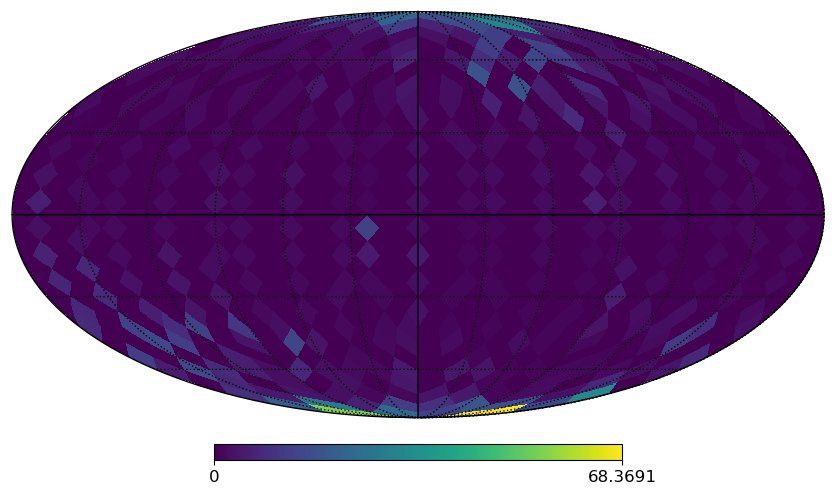

In [4]:
eps = 0.01  # shift in theta, so poles are not included
phis = np.linspace(0., 2.*Pi, PHIs)
thetas = np.linspace(0.+eps, Pi-eps, THETAs)

Nside = 2**3              # Specify nside parameter
Npix = 12 * Nside**2      # Number of pixels
print(Npix)
pix_sr = (4*np.pi)/Npix   # Pixel size  [sr]

# Pixel index for each coord.
pix_IDs = np.array(
    [hp.pixelfunc.ang2pix(Nside, phi=p, theta=t) for p in phis for t in thetas]
)

mollview_arr = np.zeros(Npix)
for pix in range(Npix):

    if np.any(pix == pix_IDs):
        OD_pix = np.sum(ODs[np.where(pix == pix_IDs)])
        mollview_arr[pix] = OD_pix 
    else:
        continue

hp.mollview(mollview_arr, title='', unit='')
hp.graticule(coord='E')